## Ensembles

The purpose of this module is to show the value of ensembles.  We will simulate predictors that have a given performance (accuracy) as a predictor of the target variable.  Then we will show that a combination of these does better than any individual one of them.

First we will create a target variable.  Assume this is the target for a classification problem.  The target should have 50% 0s and 50% 1s.

In [55]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import metrics

n=1000
# Create the target column with 50% 0s and 50% 1s
target = random.choices([0, 1], k=n)
df = pd.DataFrame({'target': target})


Now we are going to use the following code to create "predictors" - think of these as the predictions that come out of a particular model, maybe separate trees or regression models.   

We will keep the code generic, start with num_models = 3 (num_models should be an odd number)

Each predictor is created so that the accuracy is specified (p).

So, for instance if p=0.6, each of the predictors has 60% accuracy.  

In [56]:
## now create k new columns each one having success probability p
p=.6
num_models=7 # keep this as an odd number to break ties later.

for i in range(num_models):
    indices = random.sample(range(len(target)), int((1-p)*n))
    new_col = target.copy()
    for ix in indices:
        new_col[ix] = 1 - target[ix]
    df['pred'+str(i+1)] = new_col




In [57]:
df

,target,pred1,pred2,pred3,pred4,pred5,pred6,pred7
0,1,0,1,0,0,0,1,1
1,1,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0
3,1,1,1,0,1,1,0,1
4,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
995,0,0,1,0,0,1,0,1
996,1,1,0,0,1,0,1,1
997,0,0,0,0,1,0,0,1
998,0,1,0,0,1,0,0,0


Use sklearn.metrics to calculate the accuracy, precision and recall of pred1, pred2, and pred3.

Lots of other metrics you can calculate also, see [scikit learn documentation.](https://scikit-learn.org/stable/modules/model_evaluation.html)


In [58]:


f1 = metrics.f1_score(df['target'],df['pred1']).round(3)
prec = metrics.precision_score(df['target'],df['pred1']).round(3)
acc = metrics.accuracy_score(df['target'],df['pred1']).round(3)
rec = metrics.recall_score(df['target'],df['pred1']).round(3)

print("f1 = ",f1,"; accuracy =",acc,"precision = ",prec,"; recall = ",rec)

f1 =  0.575 ; accuracy = 0.6 precision =  0.578 ; recall =  0.573


Now, create a new ensemble column, `en_sum`, by summing up the values of the predictor vectors.  This represents the total number of models that predict the positive class.

Then, create your ensemble predictor `en_pred` which is 1 if `en_sum` is greater than half the number of predictors (num_models), and 0 if not.


In [59]:
en_sum = df.iloc[:, 1:].sum(axis=1)
en_pred = (en_sum > num_models/2).astype(int)

Check the accuracy, precision, recall, and f1 of your new ensemble predictor `en_pred`.  How does it compare to the individual models?

In [60]:
f1 = metrics.f1_score(df['target'],en_pred).round(3)
prec = metrics.precision_score(df['target'],en_pred).round(3)
acc = metrics.accuracy_score(df['target'],en_pred).round(3)
rec = metrics.recall_score(df['target'],en_pred).round(3)

print("f1 = ",f1,"; accuracy =",acc,"precision = ",prec,"; recall = ",rec)

f1 =  0.688 ; accuracy = 0.709 precision =  0.698 ; recall =  0.679


Now go back and change the number of models, and/or the success probability of the original model.  How does that impact the results?  

In [64]:
n=1000
p=.6
# Create the target column with 50% 0s and 50% 1s
target = random.choices([0, 1], k=n)
df = pd.DataFrame({'target': target})

max_models = 31
for i in range(max_models):
  indices = random.sample(range(len(target)), int((1-p)*n))
  new_col = target.copy()
  for ix in indices:
    new_col[ix] = 1 - target[ix]
    df['pred'+str(i+1)] = new_col



In [62]:
f1_results=[]
for num_models in np.arange(3,max_models+1,2):
  en_sum = df.iloc[:, 1:(num_models+1)].sum(axis=1)
  en_pred = (en_sum > num_models/2).astype(int)
  f1 = metrics.f1_score(df['target'],en_pred).round(3)
  f1_results.append(f1)
  print(num_models,f1)

print(f1_results)



3 0.642
5 0.683
7 0.71
9 0.752
11 0.752
13 0.775
15 0.786
17 0.806
19 0.821
21 0.836
[0.642, 0.683, 0.71, 0.752, 0.752, 0.775, 0.786, 0.806, 0.821, 0.836]


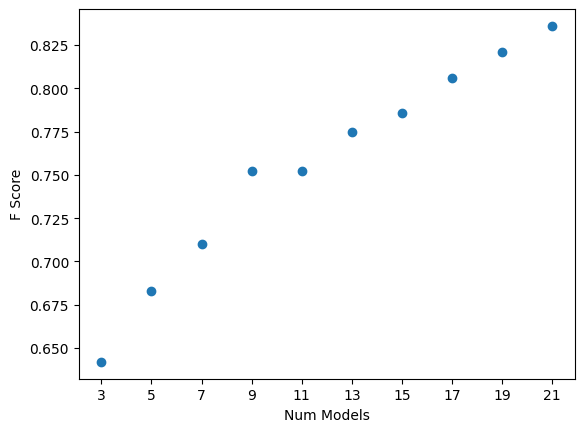

In [63]:
plt.scatter(np.arange(3,max_models+1,2),f1_results)
plt.xlabel("Num Models")
plt.ylabel("F Score")
plt.xticks(np.arange(3,max_models+1,2))
plt.show()
